**Prática de Segmentação de imagens**

In [2]:
# code here
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Faça a plotagem do histograma da imagem, observando o histograma, escolha um valor para definir um threshold

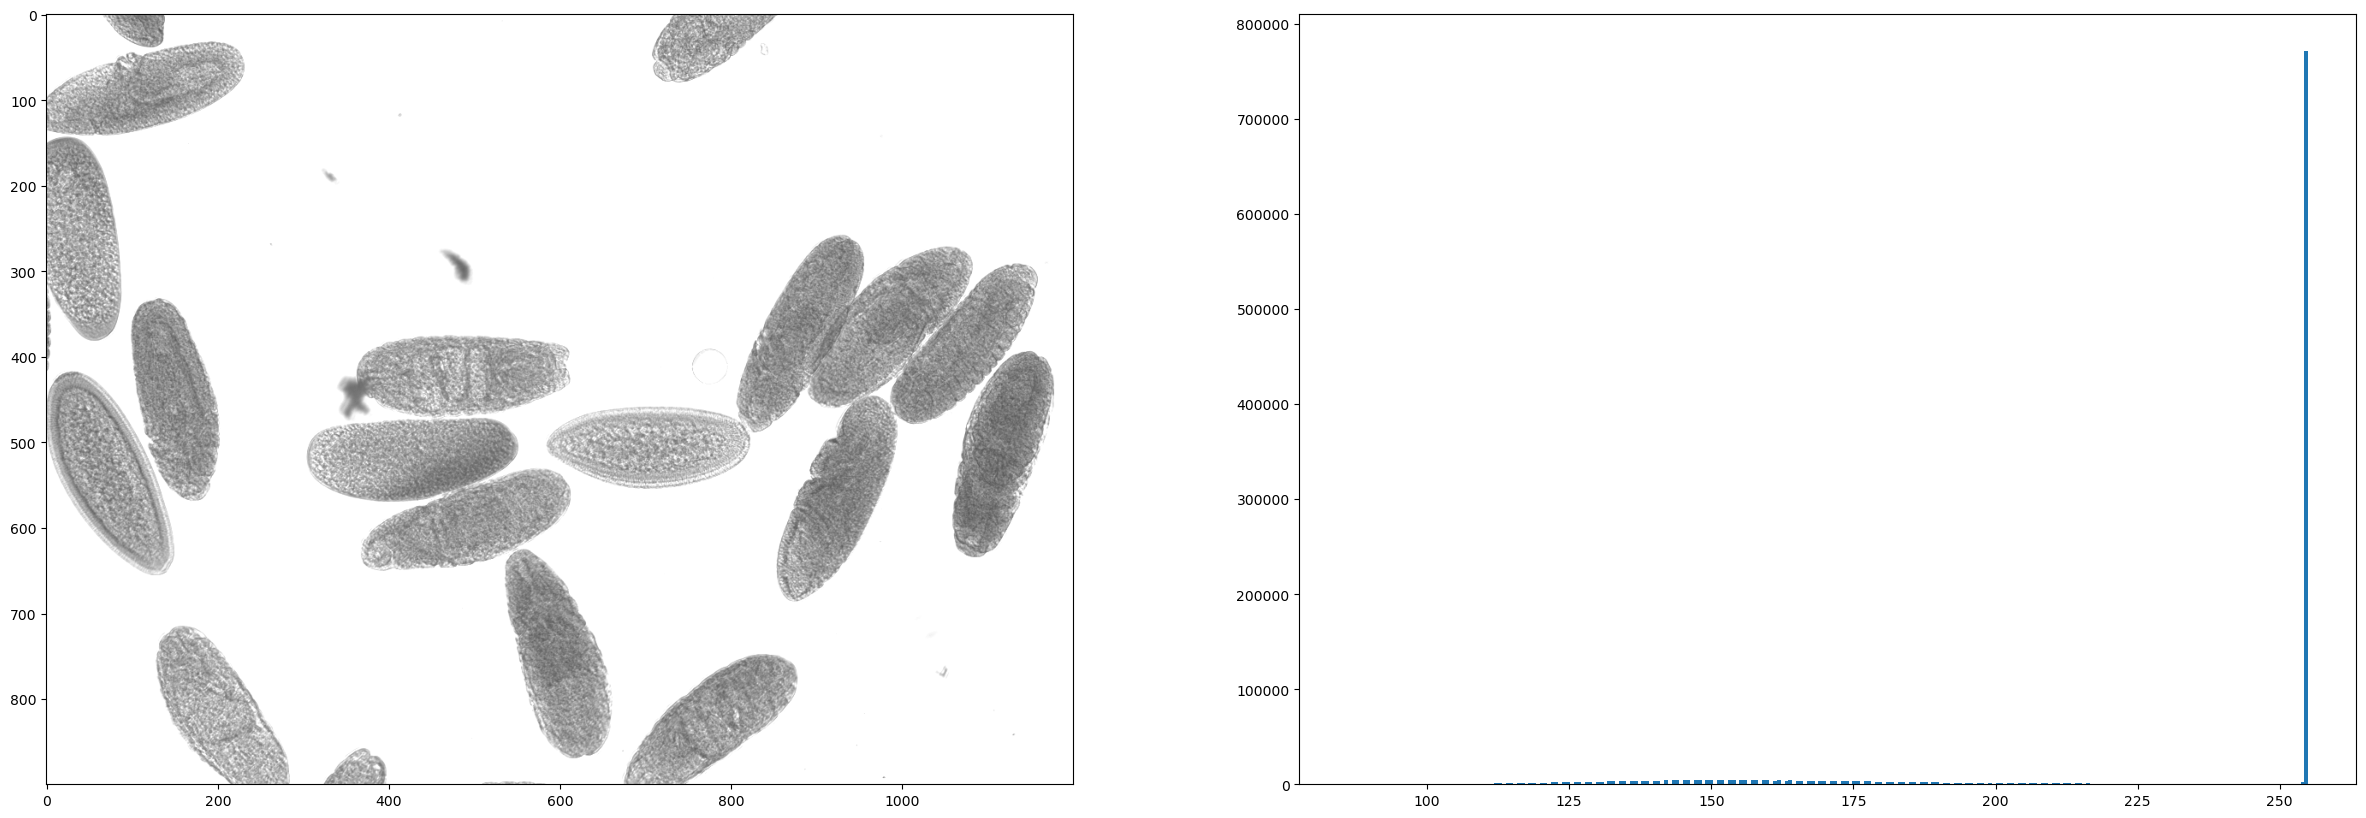

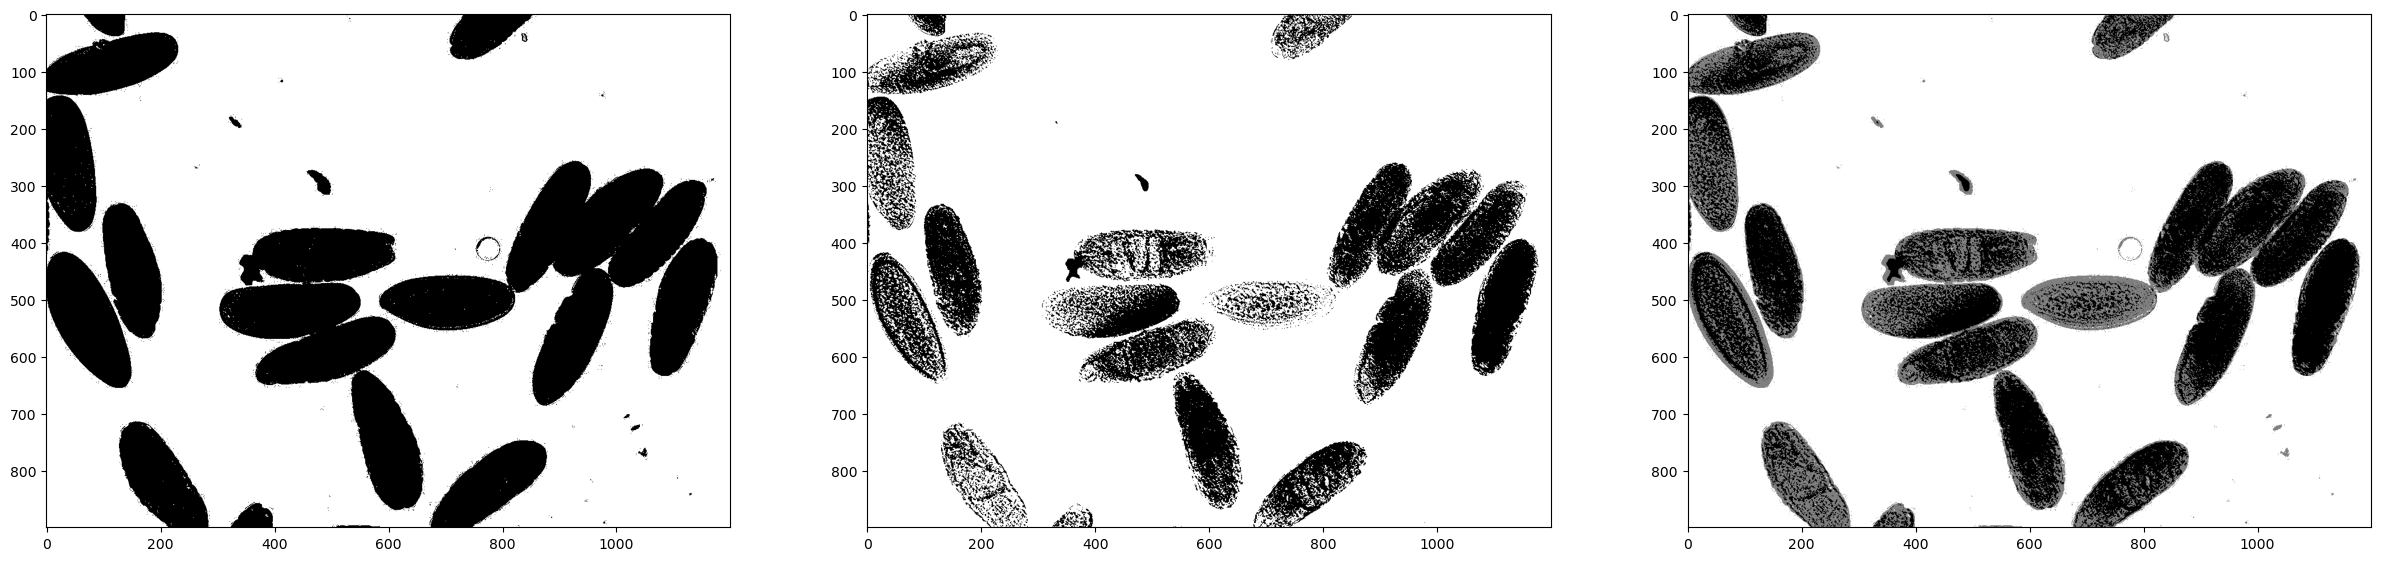

In [8]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(30, 10))
plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
#print(min(img1.flatten())) = 86
plt.hist(img1.flatten(), bins=255, range=[86, 255])

#threshholding

#th com branco e não branco
imgT = img1.copy()
imgT[img1 < 255] = 0

#th com corte em 170
imgT2 = img1.copy()
imgT2[img1 >= 170] = 255
imgT2[img1 < 170] = 0

#th com 3 cores e corte em 170 ignorando o branco
imgT3 = img1.copy()
imgT3[img1 < 255] = 127
imgT3[img1 < 170] = 0

plt.figure(figsize=(30, 10))
plt.subplot(1,3,1)
plt.imshow(imgT, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,2)
plt.imshow(imgT2, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,3)
plt.imshow(imgT3, cmap='gray', vmin=0, vmax=255)

2)	Segmentação utilizando a técnica de Threshold Adaptativo (implementar o algortimo). Faça a aplicação do Threshold com e sem suavização prévia

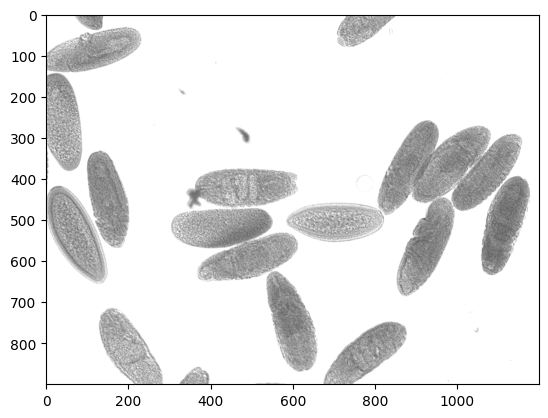

In [ ]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);


3) Segmentação utilizando a técnica de Otsu (implementar) . Faça a aplicação do Threshold com e sem suavização prévia. Mostre um gráfico com o histograma juntamente com a variância entre classes (Exemplo: https://en.wikipedia.org/wiki/File:Otsu%27s_Method_Visualization.gif)

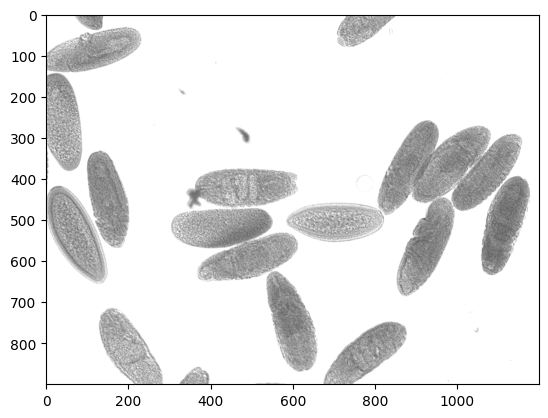

In [6]:
img1 = cv2.imread("insitu107595.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);

In [ ]:
4)	Aplique o Otsu para a imagem HE.jpg, madrill.tiff e  Lenna.jpg (use antes a conversão da imagem para tons de cinza)

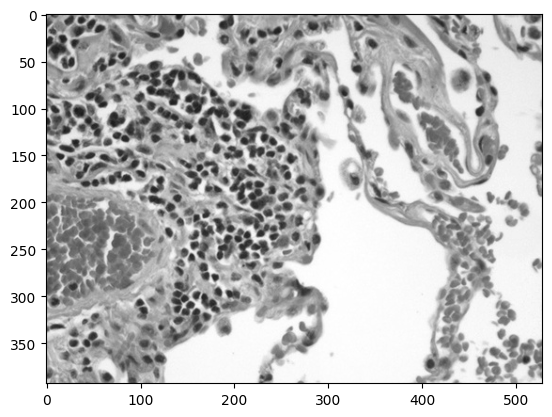

In [7]:
img1 = cv2.imread("HE.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255);